# Introduction

Challenge in this data set analysis is to the analyse the factors that influence the Housing prices.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
 

In [3]:
#conda update scikit-learn

In [4]:
#pip install sklearn


In [5]:
train = pd.read_csv("train.csv")
train.drop('Id',axis=1,inplace=True)
#test.drop('Id',axis=1,inplace=True)
train


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
#for col in test.columns:
    #print(col)
for col in train.select_dtypes(include=['object']):
    print(col)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [75]:
test=pd.read_csv("test.csv")
testid=test['Id']
#test.drop('Id',axis=1,inplace=True)
test.head()
testid

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [8]:
missing_column_values=train.isnull().sum()

#print(missing_column_values[missing_column_values>0])

dttypes_miss=missing_column_values[missing_column_values>0]
dttypes_miss

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
missing_column_values1=test.isnull().sum()

#print(missing_column_values[missing_column_values>0])

dttypes_miss1=missing_column_values1[missing_column_values1>0]
dttypes_miss1

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [10]:
# Dropping columns which has more than 50% of missing values in train and test
#train.drop(['Fence','MiscFeature','PoolQC','Alley','FireplaceQu','Id'],axis=1,inplace=True)
#test.drop(['Fence','MiscFeature','PoolQC','Alley','FireplaceQu','Id'],axis=1,inplace=True)


In [11]:
#Number of columns in both train and test

#Train
print("Train data")
print("Number of rows in train data: ",train.shape[0])
print("Number of Columns in train data: ",train.shape[1])

#Test
print("Test data")
print("Number of rows in test data: ",test.shape[0])
print("Number of Columns in test data: ",test.shape[1])

Train data
Number of rows in train data:  1460
Number of Columns in train data:  80
Test data
Number of rows in test data:  1459
Number of Columns in test data:  79


In [12]:
train['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

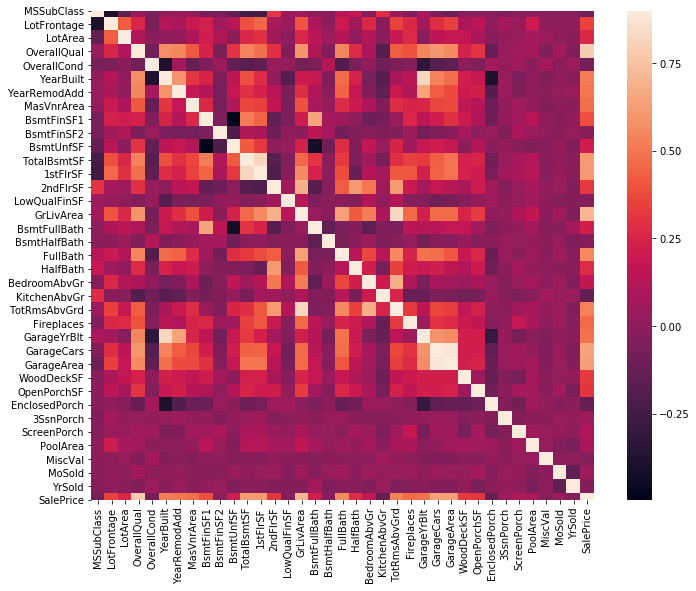

In [13]:
import seaborn as sns
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=0.9, square=True)
plt.show();

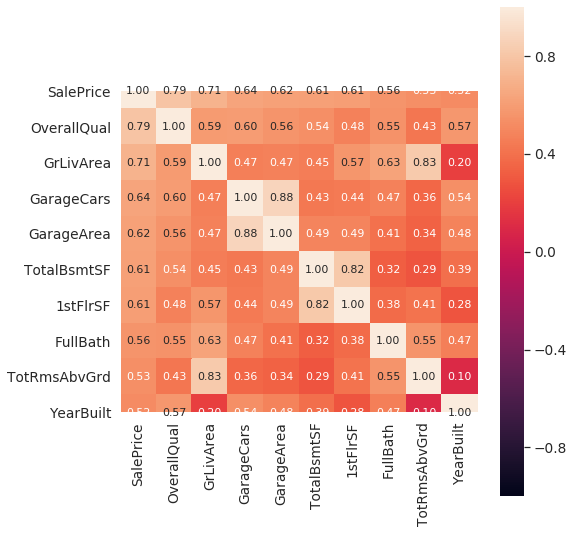

In [14]:
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(8,9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 11},vmin=-1,vmax=1, yticklabels=cols.values,
                 xticklabels=cols.values)

plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

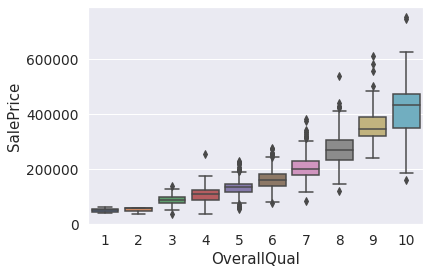

In [15]:
## From the above example let us take the features that has high correlation with saleprice for analysis

x=sns.boxplot(x='OverallQual',y='SalePrice',data=train)
#plt.xticks(rotation=90)


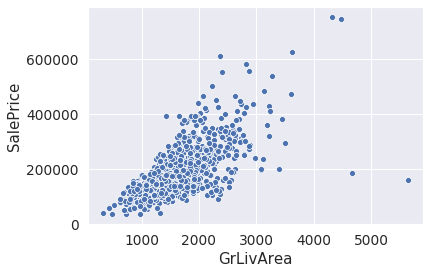

In [16]:
x=sns.scatterplot(x='GrLivArea',y='SalePrice',data=train)
#plt.xticks(rotation=90)

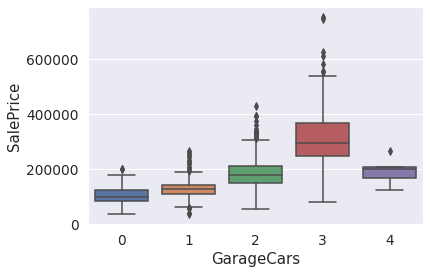

In [17]:
x=sns.boxplot(x='GarageCars',y='SalePrice',data=train)
#plt.xticks(rotation=90)

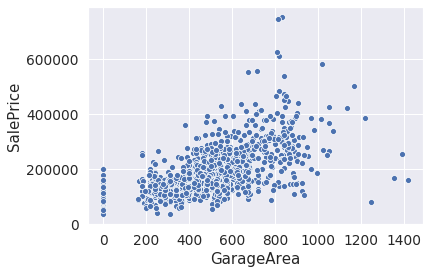

In [18]:
x=sns.scatterplot(x='GarageArea',y='SalePrice',data=train)
#plt.xticks(rotation=90)

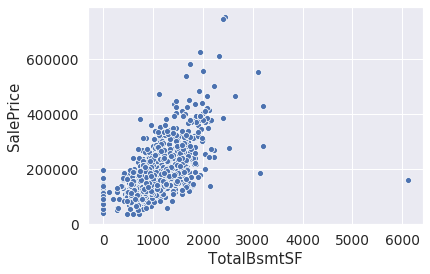

In [19]:
x=sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=train)
#plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

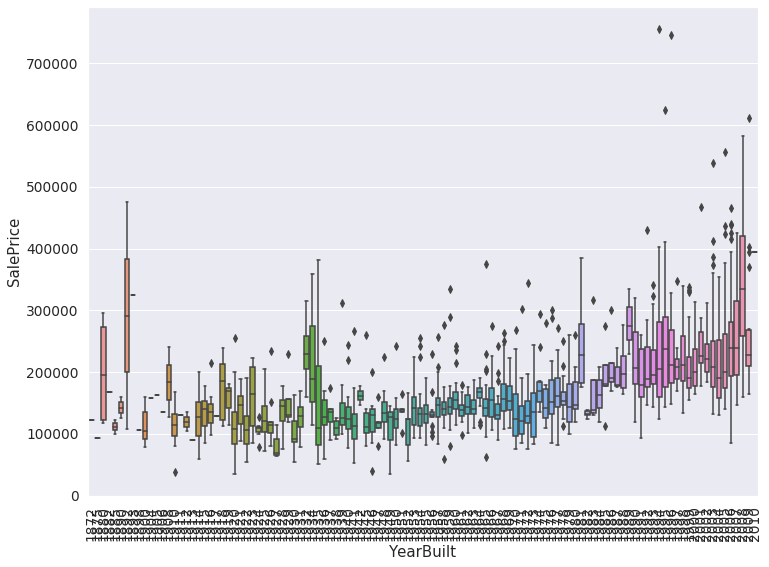

In [20]:
f,ax=plt.subplots(figsize=(12,9))
x=sns.boxplot(x='YearBuilt',y='SalePrice',data=train)

plt.xticks(rotation=90)

In [21]:
#concat test and training data set
Housing_data=pd.concat([train,test],axis=0,sort=True)
Housing_data.head()
print("Conctenated housing data size{}".format(Housing_data.shape))

Conctenated housing data size(2919, 80)


In [22]:
# finding the missing data ratio of all the columns

housing_data_na=(Housing_data.isnull().sum()/len(Housing_data))*100
housing_data_na=housing_data_na.drop(housing_data_na[housing_data_na==0].index).sort_values(ascending=False)
missing_ratio=pd.DataFrame({'Missing Ratio':housing_data_na})
missing_ratio.head(20)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
SalePrice,49.982871
FireplaceQu,48.646797
LotFrontage,16.649538
GarageQual,5.447071
GarageCond,5.447071
GarageFinish,5.447071


In [23]:
# Dropping columns which has more than 80% of missing values in Housing data, 
#since even after imputing the value there wont be any significance of the data.
Housing_data.drop(['Fence','MiscFeature','PoolQC','Alley'],axis=1,inplace=True)


In [24]:
Housing_data.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [25]:
Housing_data['CentralAir'].dtypes

dtype('O')

In [26]:
# For some categorical variables NaN means absent of particular amenity so we will replace them with 'None'
#For handling the categorical features first we have to encode their values, in order for that
# * created a list with column names, checked if it is of object datatype , then encode it 

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
hlist=list(Housing_data.columns.values)
hdfobj=pd.DataFrame(hlist)

for value in hlist:
    if Housing_data.dtypes[value]==np.object:
        #for value in hlist:
        #Housing_data[value].fillna(all_data[value].mode()[0])
        Housing_data[value].fillna('None')
        lbl = LabelEncoder()
        lbl.fit(list(Housing_data[value].values))
        Housing_data[value] = lbl.transform(list(Housing_data[value].values))
   
    




In [27]:
 #Imputing values for columns with datatype other than object
for value in hlist:
    if Housing_data.dtypes[value]!=np.object:
       imr = SimpleImputer(missing_values= np.nan, strategy='mean')
       imr = imr.fit(Housing_data[[value]])
       Housing_data[value]=imr.transform(Housing_data[[value]]).ravel()


In [64]:
#To check if all nan values has been removed
missing_column_values2=Housing_data.isnull().sum()

dttypes_miss2=missing_column_values2[missing_column_values2>0]
dttypes_miss2





Series([], dtype: int64)

## 1) Linear Regression and multiple linear regression

In [67]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train= train.SalePrice.values
train = pd.DataFrame(Housing_data[:ntrain])
test1 = pd.DataFrame(Housing_data[ntrain:])


In [30]:
# Let us see if there is a linear relationship between sale prie and highly correlated variable
# Linear Regression
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
X=Housing_data[['GrLivArea']]
Y=Housing_data['SalePrice']
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]



array([193006.34331612, 167131.07020215, 197395.89857653, 193410.64445853,
       221191.90867241])

In [31]:
print('Intercept value',lm.intercept_)
print('Coeff value' ,lm.coef_)

Intercept value 94241.34995697632
Coeff value [57.75730606]


In [32]:
# Multiple Linear Regression with highly correlated variables 
Z=Housing_data[['GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF']]
Y=Housing_data['SalePrice']
lm.fit(Z,Y)
Zhat=lm.predict(Z)
Zhat[0:5]

print('Intercept value',lm.intercept_)
print('Coeff value' ,lm.coef_)


Intercept value 74407.67946223007
Coeff value [ 3.84959044e+01  1.19643612e+04  9.76903765e+00  2.79507056e+01
 -5.53090634e+00]


## Model Evaluation using Data Visualisation

(0, 791139.2375809585)

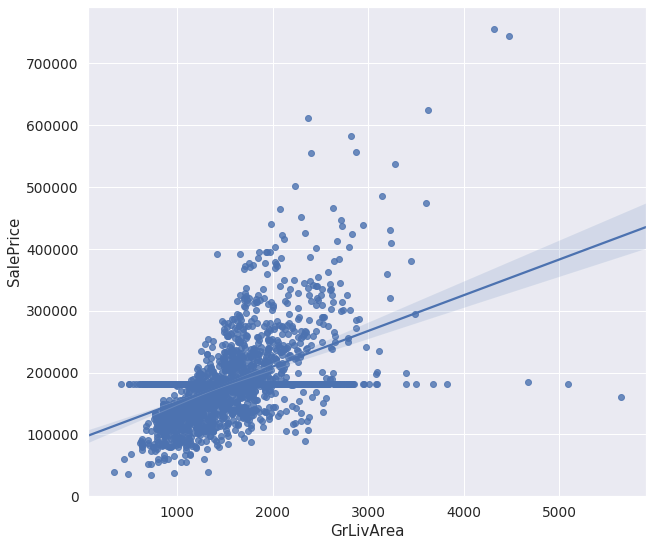

In [33]:
width = 10
height = 9
plt.figure(figsize=(width, height))
sns.regplot(x="GrLivArea", y="SalePrice", data=Housing_data)
plt.ylim(0,)

(0, 791139.2375809585)

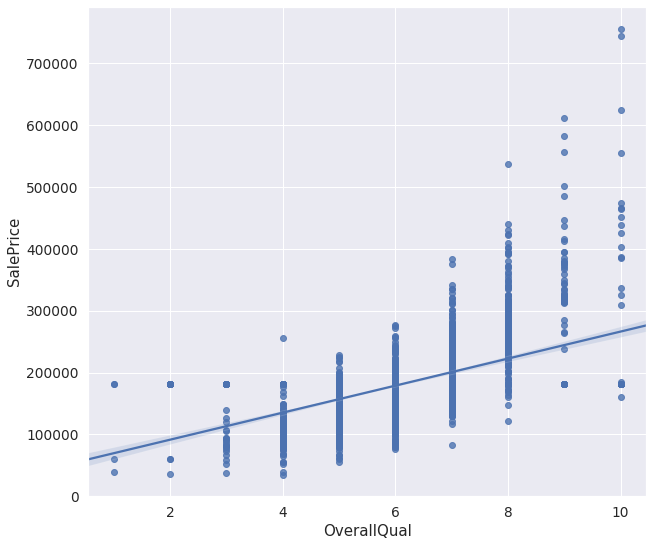

In [34]:
width = 10
height = 9
plt.figure(figsize=(width, height))
sns.regplot(x="OverallQual", y="SalePrice", data=Housing_data)
plt.ylim(0,)

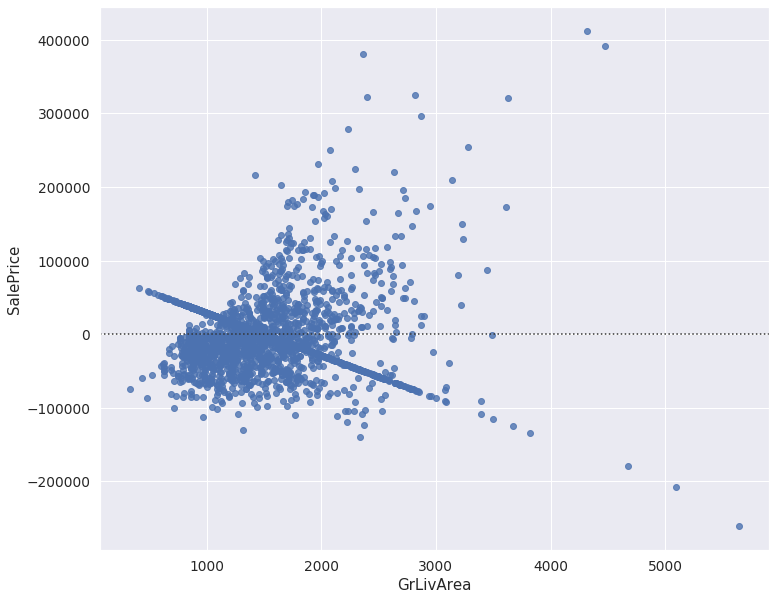

In [35]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(Housing_data['GrLivArea'], Housing_data['SalePrice'])
plt.show()

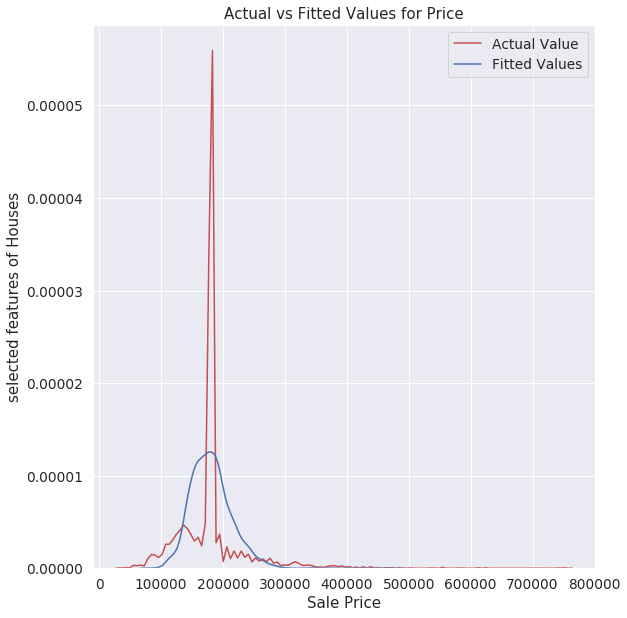

In [36]:
# For multiple linear regression lets use distribution plot to if this can be used to build model

plt.figure(figsize=(9, 10))


ax1 = sns.distplot(Housing_data['SalePrice'], hist=False, color="r", label="Actual Value")
sns.distplot(Zhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Sale Price')
plt.ylabel('selected features of Houses')

plt.show()
plt.close()

In [37]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ grlivarea')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Houses')

    plt.show()
    plt.close()

In [38]:
x = Housing_data['TotRmsAbvGrd']
y = Housing_data['SalePrice']

In [39]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3        2
-233.5 x + 5509 x - 2.671e+04 x + 1.849e+05


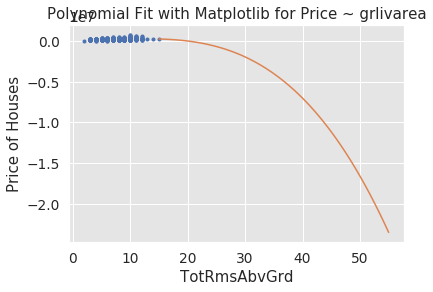

In [40]:
PlotPolly(p, x, y, 'TotRmsAbvGrd')

In [41]:
np.polyfit(x, y, 3)

array([  -233.53497398,   5508.58802918, -26707.70102741, 184907.64965518])

In [42]:
X=train[['GrLivArea']]
Y=train['SalePrice']

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [43]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)
yhat=linreg.predict(x_test)
#yhat1=linreg.predict(x_train)
#MSE1=mean_squared_error(y_train,yhat1)
yhat[0:5]
#print(MSE1)

array([191820.02162511, 200889.6055044 , 301302.85559651, 122934.37263719,
       117319.86833096])

In [44]:
# Calculatio mean squared error
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,yhat)
MSE
np.sqrt(MSE)

63781.70807695532

In [45]:
print("The R-square ",linreg.score(X,Y))

The R-square  0.5019475603744088


In [46]:
#Let us use multiple linear regression tp predict

X1=train[['GrLivArea','OverallQual','TotalBsmtSF','1stFlrSF','GarageArea','GarageCars']]
Y1=train['SalePrice']

x_train1,x_test1,y_train1,y_test1=train_test_split(X1,Y1,test_size=0.2)

lreg=LinearRegression()
lreg.fit(x_train1,y_train1)
yhat1=lreg.predict(x_test1)

print('The R- square',lreg.score(X1,Y1))

The R- square 0.761657053282341


In [47]:
#MSE of multiple linear regression

mse1=mean_squared_error(y_test1,yhat1)
mse1
np.sqrt(mse1)

32833.48732865826

In [58]:
missing_column_values3=test.isnull().sum()
missing_column_values3
dttypes_miss3=missing_column_values3[missing_column_values3>0]
dttypes_miss3


MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [77]:
test_values=test1[['GrLivArea','OverallQual','TotalBsmtSF','1stFlrSF','GarageArea','GarageCars']]
test_values
lreg=LinearRegression()
lreg.fit(x_train1,y_train1)
ytest=lreg.predict(test_values)
ytest

submit=pd.DataFrame()
submit['Id']=testid
submit['SalePrice']=ytest
submit.head(5)


,Id,SalePrice
0,1461,114818.363811
1,1462,164871.744148
2,1463,157381.985840
3,1464,180343.462209
4,1465,227936.419483


In [78]:
submit.to_csv('submission.csv', index = False)